# Local excitation/lateral inhibition linear rate model

### The following code will provide an example of the effect of various input patterns have on the outputs of a recurrant network with local excitation/lateral inhibition connectivity.

### Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import skimage

from linearLELI import runModel

### Model parameters

In [10]:
#parameters
networkSize=(60,60)  #(N,M) in pixels
n_patterns=5         # number of stimuli
nevents=40           # trials per stimulus pattern
h=0.4                  # heterogenity (range 0-1)
perc_amp=0.1         #strength of structured component of input
seed=1              # random noise seed

sigmamax=1.8
inhib_factor=2
network_resolution=runModel_v2.calcSpatialScale(sigmax=sigmamax,inh_factor=inhib_factor) 

## Run model -- uniform input

In [11]:
#Run model
evts,inputs=runModel_v2.runModel(networkSize=networkSize,nevents=nevents,index=seed,structured_input=None,strength_deformation=h)

Text(0, 0.5, 'Outputs')

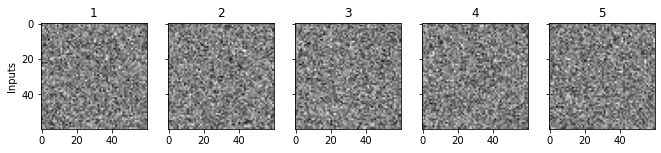

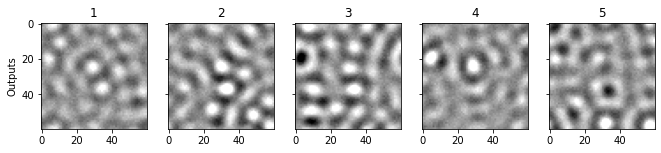

In [12]:
#Plot inputs
ncols=5
nrows=1
fh,axs=plt.subplots(nrows,ncols,figsize=(11,11),sharex=True,sharey=True) # make an array of subplot axes
for i,(ax,evt) in enumerate(zip(axs.flatten(),inputs)):
    im=ax.imshow(evt,cmap=cm.gray,vmin=0,vmax=2)
    ax.set_title(i+1)
axs[0].set_ylabel('Inputs')

fh,axs=plt.subplots(nrows,ncols,figsize=(11,11),sharex=True,sharey=True) # make an array of subplot axes
for i,(ax,evt) in enumerate(zip(axs.flatten(),evts)):
    im=ax.imshow(evt,cmap=cm.gray,vmin=-5,vmax=5)
    ax.set_title(i+1)
axs[0].set_ylabel('Outputs')

## Run model -- spatially structured inputs

### Generate spatially structured inputs (same spatial frequency)

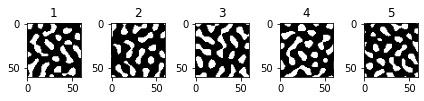

In [13]:
#bandpass cutoffs (pixels)
low=4
high=6

input_patterns=runModel_v2.generateRandomBandpassPatterns(low,high,imgSize=networkSize,npatterns=n_patterns,seed=81622)

#binarize (optional)
input_patterns=np.array(input_patterns>np.percentile(input_patterns,68),dtype='float') 

#show patterns
fig,axes=plt.subplots(1,5)
for ipattern, pattern in enumerate(input_patterns):
    axes[ipattern].imshow(pattern,cmap=cm.gray)
    axes[ipattern].set_title(str(ipattern+1))
plt.tight_layout()

In [14]:
# Run model
# Can take a few minutes, depending on the number of events

stim_events=[]
for structured_input in input_patterns:
    
    #normalize to maximum 1, minimum 0
    min1=np.min(structured_input)
    max1=np.max(structured_input)
    structured_input=(structured_input-min1)/(max1-min1)

    evts,inputs=runModel_v2.runModel(networkSize=networkSize,nevents=nevents,index=seed,structured_input=structured_input,structured_amp=perc_amp,strength_deformation=h)
    stim_events.append(evts)

Adding structured input
Adding structured input
Adding structured input
Adding structured input
Adding structured input


Text(0.5, 1.0, 'Mean')

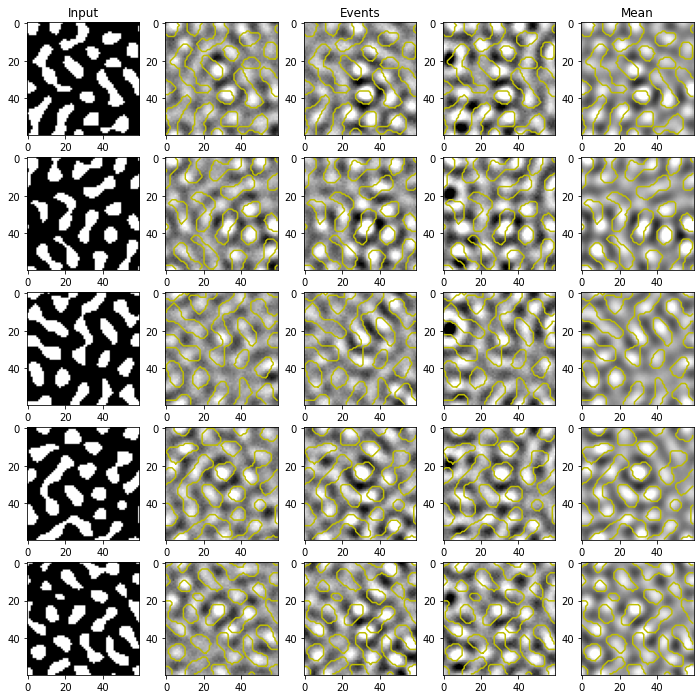

In [19]:
#Plot patterns
n_examples=3
show_contours=True
fig,axes=plt.subplots(n_patterns,n_examples+2,figsize=(12,12))


for ipattern, pattern in enumerate(input_patterns):
    #plot input pattern
    axes[ipattern,0].imshow(pattern,cmap=cm.gray)
    conC=skimage.measure.find_contours(pattern,0.05) #contour of stimulus input pattern
    
    evts=stim_events[ipattern]
    
    #plot individual trial examples
    for ievt in range(n_examples):
        axes[ipattern,ievt+1].imshow(evts[ievt],cmap=cm.gray,vmin=-5,vmax=5)
        if show_contours:
            for c in conC:
                axes[ipattern,ievt+1].plot(c[:,1],c[:,0],color='y',lw=1.5,alpha=1) 
    
    #plot mean response
    axes[ipattern,n_examples+1].imshow(np.nanmean(evts,axis=0),cmap=cm.gray,vmin=-4,vmax=4)
    if show_contours:
            for c in conC:
                axes[ipattern,n_examples+1].plot(c[:,1],c[:,0],color='y',lw=1.5,alpha=1) 

axes[0,0].set_title('Input')
axes[0,2].set_title('Events')
axes[0,4].set_title('Mean')


### Generate spatially structured inputs -- varying spatial frequency

(3, 60, 60)


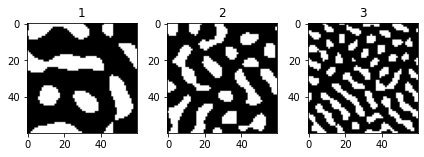

In [32]:
#bandpass cutoffs (pixels)
spat_freqs=[2,4,7]
bw_step=2   #bandwidth step size
n_patterns2=1

inputs=[]
for spat_freq in spat_freqs:
    input_patterns=runModel_v2.generateRandomBandpassPatterns(spat_freq,spat_freq+bw_step,imgSize=networkSize,npatterns=n_patterns2,seed=81622)

    #binarize (optional)
    input_patterns=np.array(input_patterns>np.percentile(input_patterns,68),dtype='float') 
    inputs.append(np.array(input_patterns))

input_patterns=np.squeeze(np.array(inputs))
print(input_patterns.shape)

#show patterns
fig,axes=plt.subplots(1,3)
for ipattern, pattern in enumerate(input_patterns):
    axes[ipattern].imshow(pattern,cmap=cm.gray)
    axes[ipattern].set_title(str(ipattern+1))
plt.tight_layout()

In [33]:
# Run model
stim_events=[]
for structured_input in input_patterns:
    
    #normalize to maximum 1, minimum 0
    min1=np.min(structured_input)
    max1=np.max(structured_input)
    structured_input=(structured_input-min1)/(max1-min1)

    evts,inputs=runModel_v2.runModel(networkSize=networkSize,nevents=nevents,index=seed,structured_input=structured_input,structured_amp=perc_amp,strength_deformation=h)
    stim_events.append(evts)

Adding structured input
Adding structured input
Adding structured input


Text(0.5, 1.0, 'Mean')

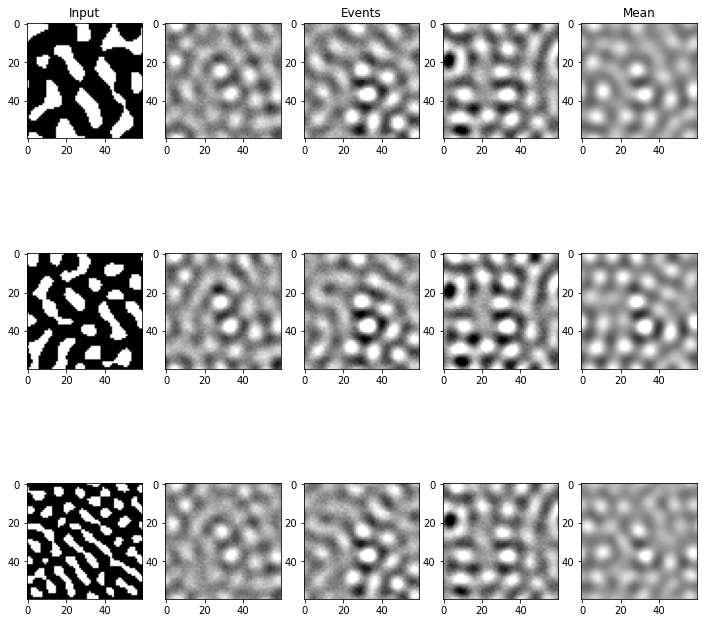

In [31]:
#Plot patterns
n_examples=3
show_contours=False
fig,axes=plt.subplots(input_patterns.shape[0],n_examples+2,figsize=(12,12))


for ipattern, pattern in enumerate(input_patterns):
    #plot input pattern
    axes[ipattern,0].imshow(pattern,cmap=cm.gray)
    conC=skimage.measure.find_contours(pattern,0.05) #contour of stimulus input pattern
    
    evts=stim_events[ipattern]
    
    #plot individual trial examples
    for ievt in range(n_examples):
        axes[ipattern,ievt+1].imshow(evts[ievt],cmap=cm.gray,vmin=-5,vmax=5)
        if show_contours:
            for c in conC:
                axes[ipattern,ievt+1].plot(c[:,1],c[:,0],color='y',lw=1.5,alpha=1) 
    
    #plot mean response
    axes[ipattern,n_examples+1].imshow(np.nanmean(evts,axis=0),cmap=cm.gray,vmin=-4,vmax=4)
    if show_contours:
            for c in conC:
                axes[ipattern,n_examples+1].plot(c[:,1],c[:,0],color='y',lw=1.5,alpha=1) 

axes[0,0].set_title('Input')
axes[0,2].set_title('Events')
axes[0,4].set_title('Mean')